In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import xgboost as xgb
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [24]:
data = pd.read_csv('./yizhi/data.csv')
data.head()

,gender,race,age,trans,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,...,lactate_val,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,bun
0,1.104266,0.0,-0.861151,1,-0.411171,-0.093154,0.0,-0.120611,-0.347495,-0.375039,...,-0.512824,-0.340524,-0.732421,-0.299237,-0.364850,-0.508104,-0.020748,-0.396746,0.075639,0.409091
1,1.104266,0.0,0.082263,1,-0.411171,-0.093154,0.0,-0.120611,-0.347495,-0.375039,...,NaN,NaN,NaN,NaN,-0.034920,0.157299,0.002685,-0.509022,NaN,0.177557
2,-0.905579,0.0,-0.598176,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.300578,-0.320666,-0.299237,-0.223451,-0.447613,-0.025008,0.651163,-0.845025,0.397727
3,1.104266,0.0,-1.780367,1,-0.411171,-0.093154,0.0,-0.120611,-0.347495,-0.375039,...,NaN,-0.330537,-0.423605,-0.299237,-0.600514,-0.447613,-0.015582,NaN,NaN,0.246212
4,-0.905579,0.0,-0.765787,1,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.750821,-0.300578,-0.416742,-0.299237,-0.223451,-0.145157,-0.025114,-0.097343,NaN,0.216942


In [25]:
y = data.loc[:, 'trans']
X = data.drop('trans', axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=22)
X_train

,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,hypertension,...,lactate_val,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,bun
750,1.104266,0.0,0.416040,-0.411171,-0.093154,0.0,-0.120611,-0.347495,-0.375039,1.257115,...,NaN,NaN,NaN,NaN,1.049137,0.278281,-0.017552,NaN,NaN,0.303030
532,-0.905579,0.0,-0.787678,-0.411171,-0.093154,0.0,-0.120611,-0.347495,-0.375039,-0.795472,...,NaN,-0.180742,-0.499093,-0.194582,-0.647647,-0.326631,-0.026712,-0.097343,NaN,0.170455
2889,-0.905579,0.0,-0.487180,-0.411171,-0.093154,0.0,-0.120611,-0.347495,-0.375039,-0.795472,...,NaN,NaN,NaN,NaN,-0.741913,-0.266139,-0.009830,NaN,NaN,0.126263
1069,1.104266,0.0,-2.317220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.360496,1.943991,-0.403892,-0.789046,-0.326631,-0.013878,-0.284470,NaN,0.127841
1705,-0.905579,0.0,0.927107,2.432080,-0.093154,0.0,-0.120611,-0.347495,-0.375039,-0.795472,...,NaN,3.683981,NaN,3.677650,6.610821,1.427613,-0.024635,NaN,NaN,0.509828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1.104266,0.0,-1.095074,-0.411171,-0.093154,0.0,-0.120611,-0.347495,-0.375039,-0.795472,...,0.617663,0.408454,0.084227,0.328693,-0.694780,-0.508104,-0.026819,1.886199,-0.998469,0.250000
1998,1.104266,0.0,1.171363,-0.411171,-0.093154,0.0,-0.120611,-0.347495,-0.375039,-0.795472,...,NaN,-0.540251,0.001876,-0.508547,-0.176318,-0.205648,-0.029428,-0.172194,NaN,0.250000
1840,1.104266,0.0,0.935427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.201168,0.068917,0.873426,0.014728,3.028720,0.399263,-0.029375,0.014933,NaN,0.511364
263,1.104266,0.0,1.338761,-0.411171,-0.093154,0.0,-0.120611,-0.347495,-0.375039,-0.795472,...,NaN,-0.520278,-0.197139,-0.508547,-0.411983,-0.205648,-0.018884,NaN,NaN,0.193182


In [28]:
dX= xgb.DMatrix(X, y, enable_categorical=True)
dtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)

param = {"tree_method": "approx", 'max_depth':3, 'min_child_weight': 1, 'objective':'binary:logistic', 'eval_metric': 'auc', 
"eta": 0.01, "subsample": 0.7, 'colsample_bytree': 0.6, 'gamma': 3.3, 'reg_alpha': 1, 'reg_lambda': 3,
    "base_score": np.mean(y_train)}
eval = [(dtrain, "train"), (dtest, "test")]
booster = xgb.train(param, dtrain, 500, evals=eval, verbose_eval=20, early_stopping_rounds=400)

[0]	train-auc:0.80090	test-auc:0.76941
[20]	train-auc:0.86509	test-auc:0.83260
[40]	train-auc:0.87288	test-auc:0.83816
[60]	train-auc:0.87511	test-auc:0.83962
[80]	train-auc:0.87613	test-auc:0.83933
[100]	train-auc:0.87864	test-auc:0.84174
[120]	train-auc:0.88018	test-auc:0.84288
[140]	train-auc:0.88157	test-auc:0.84329
[160]	train-auc:0.88322	test-auc:0.84562
[180]	train-auc:0.88460	test-auc:0.84708
[200]	train-auc:0.88548	test-auc:0.84867
[220]	train-auc:0.88705	test-auc:0.85014
[240]	train-auc:0.88856	test-auc:0.85112
[260]	train-auc:0.88969	test-auc:0.85178
[280]	train-auc:0.89079	test-auc:0.85255
[300]	train-auc:0.89176	test-auc:0.85331
[320]	train-auc:0.89264	test-auc:0.85403
[340]	train-auc:0.89367	test-auc:0.85486
[360]	train-auc:0.89462	test-auc:0.85546
[380]	train-auc:0.89553	test-auc:0.85604
[400]	train-auc:0.89643	test-auc:0.85596
[420]	train-auc:0.89764	test-auc:0.85668
[440]	train-auc:0.89858	test-auc:0.85739
[460]	train-auc:0.89944	test-auc:0.85775
[480]	train-auc:0.9001

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
y_pred=booster.predict(dtest)>0.5
score=accuracy_score(y_pred,y_test)
score

0.8454301075268817

In [44]:
from sklearn.metrics import roc_curve
y_pred_proba=booster.predict(dtest)
# y_pred_proba[:,1] #想看输血分类为1的概率
fpr,tpr,thres=roc_curve(y_test,y_pred_proba)

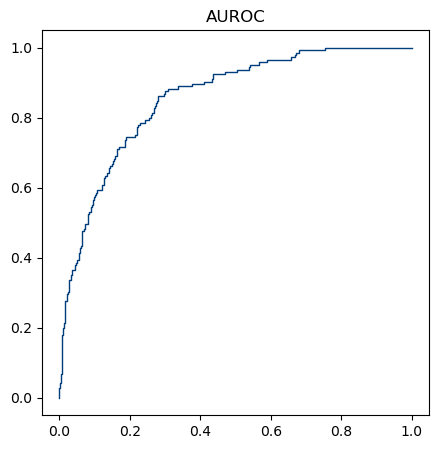

In [45]:
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
plt.figure(figsize = (5,5))
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.title('AUROC')
plt.plot(fpr,tpr,c = '#003D7C',ls='-',lw = 1,  ms = 8, mec='r',mew=3,mfc='y',alpha =1)
plt.show()

Text(46.25, 0.5, 'True')

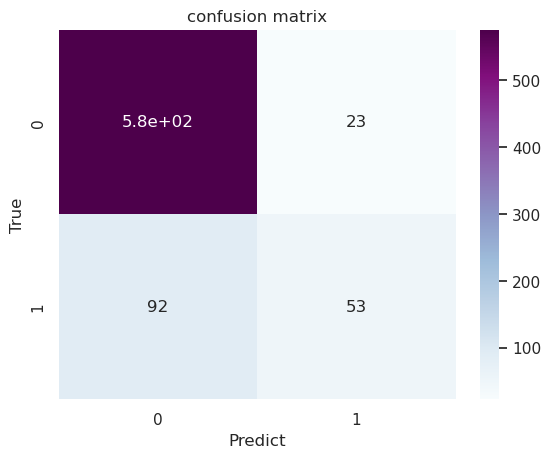

In [54]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sn.set()
f,ax=plt.subplots()
C2= confusion_matrix(y_test, y_pred, labels=[0, 1])
sn.heatmap(C2,annot=True,ax=ax, cmap="BuPu") #画热力图
ax.set_title('confusion matrix')
ax.set_xlabel('Predict')
ax.set_ylabel('True')

In [53]:
tpr

array([0.        , 0.00689655, 0.02758621, 0.02758621, 0.04137931,
       0.04137931, 0.06896552, 0.06896552, 0.08965517, 0.08965517,
       0.17931034, 0.17931034, 0.2       , 0.2       , 0.20689655,
       0.20689655, 0.2137931 , 0.2137931 , 0.23448276, 0.23448276,
       0.27586207, 0.27586207, 0.29655172, 0.29655172, 0.30344828,
       0.30344828, 0.33103448, 0.33103448, 0.33793103, 0.33793103,
       0.35172414, 0.35172414, 0.36551724, 0.36551724, 0.37931034,
       0.37931034, 0.3862069 , 0.3862069 , 0.39310345, 0.39310345,
       0.40689655, 0.40689655, 0.4137931 , 0.4137931 , 0.42758621,
       0.42758621, 0.43448276, 0.43448276, 0.46896552, 0.46896552,
       0.47586207, 0.47586207, 0.48275862, 0.48275862, 0.48965517,
       0.48965517, 0.49655172, 0.49655172, 0.51034483, 0.51034483,
       0.52413793, 0.52413793, 0.53103448, 0.53103448, 0.54482759,
       0.54482759, 0.55172414, 0.55172414, 0.56551724, 0.56551724,
       0.57241379, 0.57241379, 0.57931034, 0.57931034, 0.58620

In [50]:
thres

array([1.8722504 , 0.87225044, 0.8126529 , 0.8047208 , 0.7864474 ,
       0.7698505 , 0.7534718 , 0.7518403 , 0.74598837, 0.7443252 ,
       0.67316663, 0.6712321 , 0.6605245 , 0.65970623, 0.65896726,
       0.6550021 , 0.65473926, 0.6527367 , 0.635058  , 0.63455874,
       0.6142469 , 0.59937525, 0.58866274, 0.5802311 , 0.57200706,
       0.5659105 , 0.55074716, 0.5447661 , 0.5444431 , 0.5219427 ,
       0.5113116 , 0.5063637 , 0.50132906, 0.49654585, 0.4923114 ,
       0.49040908, 0.48922426, 0.48453644, 0.48320016, 0.47855175,
       0.47357628, 0.4715349 , 0.47075534, 0.46376115, 0.46246347,
       0.46209082, 0.46172363, 0.44453508, 0.4381642 , 0.43241286,
       0.42947462, 0.42613944, 0.42173806, 0.4210834 , 0.42004594,
       0.41891757, 0.41772738, 0.40304965, 0.39788654, 0.39533547,
       0.384728  , 0.37971088, 0.37830374, 0.37293053, 0.37099645,
       0.36747482, 0.36603013, 0.36407208, 0.35328904, 0.35276228,
       0.35112622, 0.3498717 , 0.34539035, 0.3434188 , 0.34325

In [51]:
C2

array([[576,  23],
       [ 92,  53]])

In [55]:
y_threshold = 0.03571679

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

Text(46.25, 0.5, 'True')

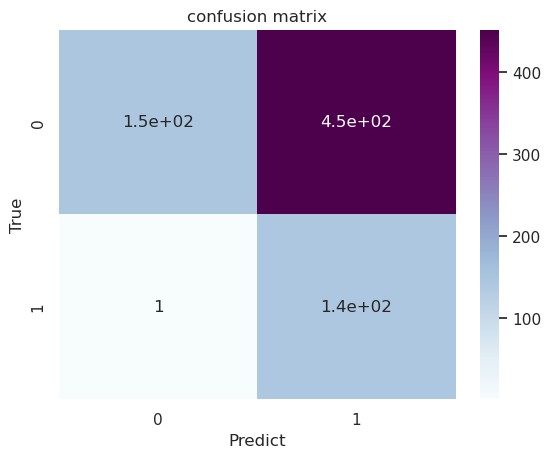

In [63]:
sn.set()
f,ax=plt.subplots()
C3= confusion_matrix(y_test, (y_pred_proba>=y_threshold).astype(int), labels=[0, 1])
sn.heatmap(C3,annot=True,ax=ax, cmap="BuPu") #画热力图
ax.set_title('confusion matrix')
ax.set_xlabel('Predict')
ax.set_ylabel('True')

In [66]:
y_test.shape

(744,)

In [64]:
C3

array([[147, 452],
       [  1, 144]])

In [57]:
# dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)
train_pred = booster.predict(dtrain)
test_pred = booster.predict(dtest) 

print("Train AUC: %.3f" % roc_auc_score(y_train,train_pred))
print('Test AUC: %.3f' % roc_auc_score(y_test,test_pred))

Train AUC: 0.900
Test AUC: 0.857


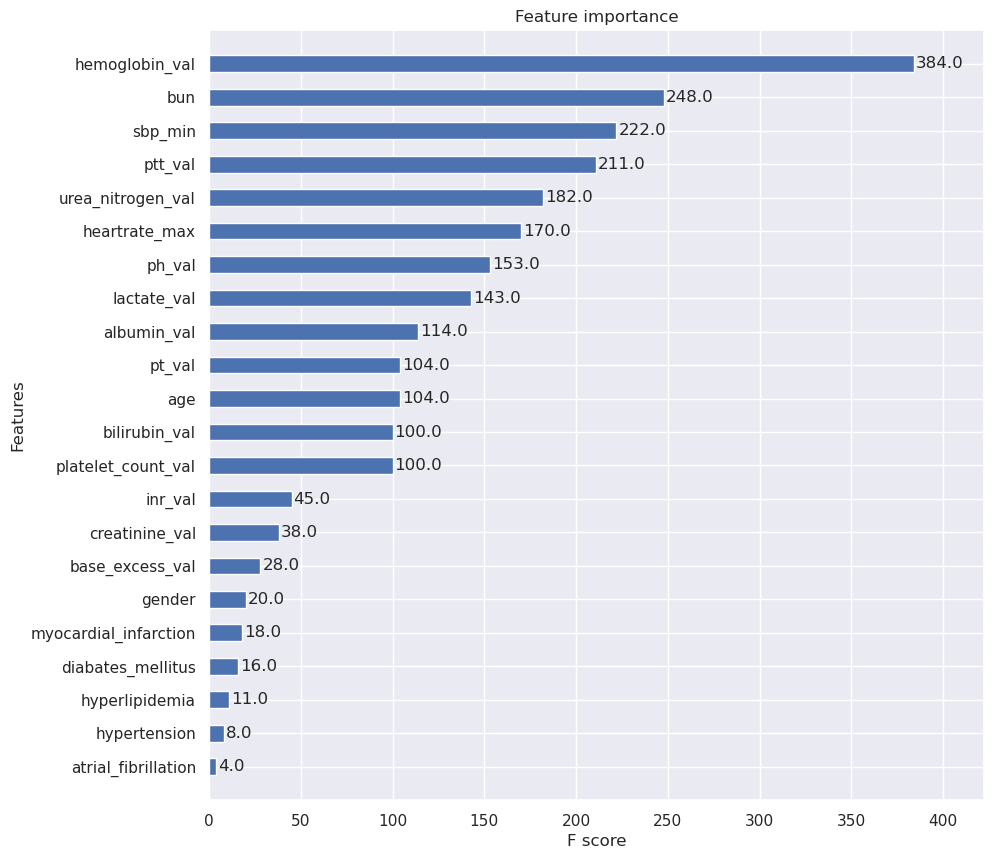

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(booster, ax, height=0.5)
plt.title("Feature importance")
plt.show()

In [59]:
# make sure the SHAP values add up to marginal predictions
pred = booster.predict(dX, output_margin=True)
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(dX)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

4.053116e-06

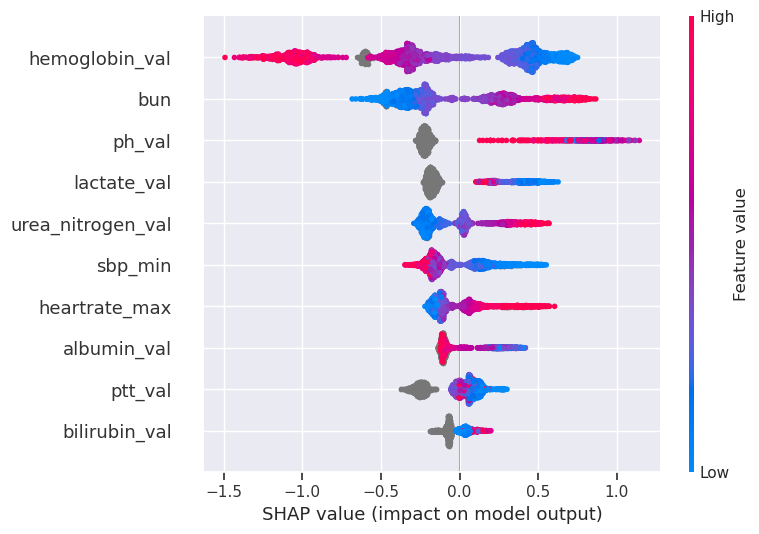

In [65]:
shap.summary_plot(shap_values, X, max_display=10)


In [30]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
cv_auc = xgb.cv(dtrain=dtrain, params=param, folds=cv, shuffle=True, seed=42,
                    num_boost_round=1000, early_stopping_rounds=50, metrics="auc")
cv_auc

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.806895,0.011206,0.783234,0.028535
1,0.834603,0.008593,0.809227,0.026020
2,0.853090,0.005965,0.825370,0.021321
3,0.855417,0.004589,0.829589,0.021140
4,0.858706,0.004649,0.831510,0.020659
...,...,...,...,...
604,0.907142,0.003113,0.856577,0.017834
605,0.907149,0.003119,0.856575,0.017819
606,0.907183,0.003116,0.856581,0.017823
607,0.907190,0.003114,0.856588,0.017821


In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
cv_param = {"tree_method": "approx", 'objective':'binary:logistic', 'eval_metric': 'auc', 
"eta": 0.01, "base_score": np.mean(y_train)}

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,15)
    for min_child_weight in range(1,10)
]

# Define initial best params and AUC
max_auc = 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    cv_param['max_depth'] = max_depth
    cv_param['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        cv_param,
        dtrain,
        num_boost_round=1000,
        seed=42,
        folds=cv,
        metrics={'auc'},
        shuffle=True,
        early_stopping_rounds=80
    )
    # Update best MAE
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (max_depth,min_child_weight)
print("Best params: max_depth = {}, min_child_weight = {}, AUC: {}".format(best_params[0], best_params[1], max_auc))

CV with max_depth=3, min_child_weight=1
	AUC 0.8516168376433076 for 427 rounds
CV with max_depth=3, min_child_weight=2
	AUC 0.8523267843079921 for 386 rounds
CV with max_depth=3, min_child_weight=3
	AUC 0.8517257542496209 for 447 rounds
CV with max_depth=3, min_child_weight=4
	AUC 0.8515828349237187 for 484 rounds
CV with max_depth=3, min_child_weight=5
	AUC 0.8515805535404422 for 450 rounds
CV with max_depth=3, min_child_weight=6
	AUC 0.8515879668842881 for 446 rounds
CV with max_depth=3, min_child_weight=7
	AUC 0.851771019300421 for 496 rounds
CV with max_depth=3, min_child_weight=8
	AUC 0.8515441018840947 for 419 rounds
CV with max_depth=3, min_child_weight=9
	AUC 0.8521431696086618 for 530 rounds
CV with max_depth=4, min_child_weight=1
	AUC 0.8515233582481093 for 319 rounds
CV with max_depth=4, min_child_weight=2
	AUC 0.85339398101333 for 263 rounds
CV with max_depth=4, min_child_weight=3
	AUC 0.8520063231987502 for 363 rounds
CV with max_depth=4, min_child_weight=4
	AUC 0.85185562